# Presets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u

from matplotlib.patches import Circle
from astropy.coordinates import SkyCoord

# Catalogues

## Imported data

In [2]:
migrating_stars_catalogue = pd.read_csv("disc_ges_selected.csv", delimiter=',') # Malu's catalogue
exoplanet_catalogue = pd.read_csv('exoplanet_catalogue.csv') # exoplanet catalogue

In [ ]:
migrating_stars_catalogue = pd.read_csv("disc_ges_selected.csv", delimiter=',') # Malu's catalogue
#print(migrating_stars_catalogue.to_string())
exoplanet_catalogue = pd.read_csv('exoplanet_catalogue.csv') # exoplanet catalogue: https://exoplanet.eu/catalog/all_fields/#downloads-section
#print(exoplanet_catalogue.to_string()) 

In [4]:
migrating_stars_catalogue

,CNAME,CNAME_iDR6_orig,GAIA_eDR3_ID,DIST_GAIA,GES_TYPE,RA,DEC,SNR,TEFF,E_TEFF,LOGG,E_LOGG,FEH,E_FEH,VRAD,E_VRAD
0,00000302-6002570,00000302-6002570,4918001166129129344,0.2278,GE_MW,0.012583,-60.049167,90.39,5780.0,34.0,4.04,0.05,-0.31,0.04,-23.90,0.32
1,00001749-5449565,00001749-5449565,4923860601032588544,0.1119,GE_MW,0.072875,-54.832361,74.95,5757.0,32.0,4.35,0.05,-0.17,0.05,24.13,0.37
2,00012216-5458205,00012216-5458205,4923656469826935936,0.1996,GE_MW,0.342333,-54.972361,74.45,5698.0,30.0,4.28,0.05,-0.07,0.05,38.45,0.37
3,00040666-3709129,00040666-3709129,2307728366713617152,0.2454,GE_MW,1.027750,-37.153583,120.09,5478.0,31.0,4.44,0.05,0.28,0.05,-4.06,0.37
4,00042981-4701022,00042981-4701022,4990102289659200000,0.2474,GE_MW,1.124208,-47.017278,95.18,5702.0,31.0,4.26,0.05,-0.34,0.05,-51.32,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,23520084-4303292,23520084-4303292,6532915638292931200,0.4745,GE_MW,358.003500,-43.058111,86.50,5839.0,32.0,4.29,0.05,0.02,0.05,-10.34,0.37
1184,23521894-3657228,23521894-3657228,2310601734194395904,0.2236,GE_MW,358.078917,-36.956333,54.29,4960.0,33.0,3.64,0.05,0.14,0.04,-34.29,0.37
1185,23552478-1454088,23552478-1454088,2419063883349804544,0.2736,GE_MW,358.853250,-14.902444,125.31,5703.0,32.0,4.37,0.05,0.20,0.17,38.04,0.37
1186,23554957-0154180,23554957-0154180,2449296501745202688,0.3321,GE_MW,358.956542,-1.905000,124.11,5555.0,31.0,4.43,0.05,0.19,0.05,8.86,0.37


In [5]:
exoplanet_catalogue

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.7430,0.28900,0.28900,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.000,80.000,NaN,NaN,HD 10697
1,112 Psc b,Confirmed,0.0330,0.00500,0.00500,0.0330,0.00500,0.00500,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
2,112 Psc c,Confirmed,9.8660,1.78100,1.78100,NaN,NaN,NaN,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
3,11 Com Ab,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8III,NaN,NaN,NaN,4742.0,100.000,100.000,NaN,NaN,HD 107383
4,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.000,70.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,ZTF J0407-00 b,Confirmed,19.0000,3.00000,3.00000,NaN,NaN,NaN,0.440,0.02,...,WD,NaN,NaN,NaN,17400.0,1200.000,1200.000,NaN,NaN,"ASASSN-18dg, Gaia 20aby"
7340,ZTF J1406+1222 Ab,Confirmed,50.0000,NaN,NaN,NaN,NaN,NaN,0.292,NaN,...,PSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7341,ZTF J1622+47 b,Confirmed,61.0000,19.00000,19.00000,NaN,NaN,NaN,0.980,0.02,...,sdB,NaN,NaN,NaN,29000.0,NaN,NaN,NaN,NaN,"PG 1621+476, ZTF J162256.66+473051.1"
7342,ZTF J1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.680,0.07,...,DA,NaN,NaN,NaN,11200.0,300.000,300.000,NaN,NaN,ZTF J163743.49+491740.4


## Column Definitions for migrating stars in Malu's Catalogue

| Column Name       | Description                                                              |
|-------------------|--------------------------------------------------------------------------|
| **CNAME**         | Unique star identifier in the catalogue                                  |
| **CNAME_iDR6_orig** | Original star identifier from the iDR6 catalogue                       |
| **GAIA_eDR3_ID**  | Gaia Early Data Release 3 star identifier                                |
| **DIST_GAIA**     | Distance to star from Gaia measurements [parsecs]                        |
| **GES_TYPE**      | Star classification according to Gaia-ESO Survey standards               |
| **RA**            | Right Ascension coordinate [decimal degrees]                             |
| **DEC**           | Declination coordinate [decimal degrees]                                 |
| **SNR**           | Signal-to-Noise Ratio, indicating data quality                           |
| **TEFF**          | Effective Temperature of the star [Kelvin]                               |
| **E_TEFF**        | Uncertainty in Effective Temperature [Kelvin]                            |
| **LOGG**          | Surface Gravity of the star [log10(cm/s²)]                               |
| **E_LOGG**        | Uncertainty in Surface Gravity [log10(cm/s²)]                            |
| **FEH**           | Metallicity: Iron-to-Hydrogen Ratio [Fe/H]                               |
| **E_FEH**         | Uncertainty in Iron-to-Hydrogen Ratio                                    |
| **VRAD**          | Radial Velocity, representing the star's movement toward/away [km/s]     |
| **E_VRAD**        | Uncertainty in Radial Velocity [km/s]                                    |


## Column Definitions for exoplanet catalogue

| **Column Name**                     | **Description**                                                              |
|-------------------------------------|-------------------------------------------------------------------------------|
| **name**                            | Name of the planet (type string)                                             |
| **planet_status**                   | The confirmation status of the planet (e.g., Confirmed, Candidate)           |
| **mass**                            | Mass of the planet (units: mjup for Jupiter mass, mearth for Earth mass)     |
| **mass_error_min**                  | Minimum error in the planet's mass                                           |
| **mass_error_max**                  | Maximum error in the planet's mass                                           |
| **mass_sini**                       | Projected mass (sine of the orbital inclination)                             |
| **mass_sini_error_min**             | Minimum error in the projected mass                                         |
| **mass_sini_error_max**             | Maximum error in the projected mass                                         |
| **radius**                          | Radius of the planet (units: rjup for Jupiter radii, rearth for Earth radii, km for kilometers) |
| **radius_error_min**                | Minimum error in the planet's radius                                        |
| **radius_error_max**                | Maximum error in the planet's radius                                        |
| **orbital_period**                  | Orbital period of the planet (units: hour, day, or year)                    |
| **orbital_period_error_min**        | Minimum error in the orbital period                                         |
| **orbital_period_error_max**        | Maximum error in the orbital period                                         |
| **semi_major_axis**                 | Semi-major axis of the orbit (units: au for astronomical units, km for kilometers, ly for light years) |
| **semi_major_axis_error_min**       | Minimum error in the semi-major axis                                        |
| **semi_major_axis_error_max**       | Maximum error in the semi-major axis                                        |
| **eccentricity**                    | Eccentricity of the planet's orbit                                          |
| **eccentricity_error_min**          | Minimum error in the planet's eccentricity                                  |
| **eccentricity_error_max**          | Maximum error in the planet's eccentricity                                  |
| **inclination**                     | Inclination of the planet's orbit (in degrees)                              |
| **inclination_error_min**           | Minimum error in the inclination                                            |
| **inclination_error_max**           | Maximum error in the inclination                                            |
| **angular_distance**                | Angular distance between the planet and its host star                       |
| **discovered**                      | Year of discovery of the planet                                              |
| **updated**                         | Last update date of the data                                                 |
| **omega**                           | Argument of periastron (units: degrees or radians)                           |
| **omega_error_min**                 | Minimum error in the argument of periastron                                 |
| **omega_error_max**                 | Maximum error in the argument of periastron                                 |
| **tperi**                           | Time of periastron passage (in Julian dates)                                |
| **tperi_error_min**                 | Minimum error in the time of periastron passage                             |
| **tperi_error_max**                 | Maximum error in the time of periastron passage                             |
| **tconj**                           | Time of conjunction (in Julian dates)                                       |
| **tconj_error_min**                 | Minimum error in the time of conjunction                                    |
| **tconj_error_max**                 | Maximum error in the time of conjunction                                    |
| **tzero_tr**                        | Time of zero transit (in Julian dates)                                      |
| **tzero_tr_error_min**              | Minimum error in the time of zero transit                                   |
| **tzero_tr_error_max**              | Maximum error in the time of zero transit                                   |
| **tzero_tr_sec**                    | Time of zero transit (in seconds)                                           |
| **tzero_tr_sec_error_min**          | Minimum error in the time of zero transit in seconds                        |
| **tzero_tr_sec_error_max**          | Maximum error in the time of zero transit in seconds                        |
| **lambda_angle**                    | Longitude of the planet's orbital node (in degrees)                          |
| **lambda_angle_error_min**          | Minimum error in the planet's longitude of node                             |
| **lambda_angle_error_max**          | Maximum error in the planet's longitude of node                             |
| **impact_parameter**                | Impact parameter (defines how close a transit is to the star's center)      |
| **impact_parameter_error_min**      | Minimum error in the impact parameter                                        |
| **impact_parameter_error_max**      | Maximum error in the impact parameter                                        |
| **tzero_vr**                        | Time of zero radial velocity (in Julian dates)                              |
| **tzero_vr_error_min**              | Minimum error in the time of zero radial velocity                           |
| **tzero_vr_error_max**              | Maximum error in the time of zero radial velocity                           |
| **k**                               | Coefficient of the radial velocity variation curve                           |
| **k_error_min**                     | Minimum error in the coefficient of the radial velocity curve                |
| **k_error_max**                     | Maximum error in the coefficient of the radial velocity curve                |
| **temp_calculated**                 | Calculated temperature of the planet (in Kelvin)                            |
| **temp_calculated_error_min**       | Minimum error in the calculated temperature                                  |
| **temp_calculated_error_max**       | Maximum error in the calculated temperature                                  |
| **temp_measured**                   | Measured temperature of the planet (in Kelvin)                              |
| **hot_point_lon**                   | Longitude of the hot spot on the planet                                      |
| **geometric_albedo**                | Geometric albedo of the planet (reflectivity)                               |
| **geometric_albedo_error_min**      | Minimum error in the geometric albedo                                       |
| **geometric_albedo_error_max**      | Maximum error in the geometric albedo                                       |
| **log_g**                           | Logarithmic surface gravity of the planet                                   |
| **publication**                     | Reference to the publication where the data is presented                   |
| **detection_type**                  | Type of detection method used (e.g., Radial Velocity, Transit, etc.)        |
| **mass_measurement_type**           | Type of mass measurement used (e.g., Direct, Sine, etc.)                    |
| **radius_measurement_type**         | Type of radius measurement used (e.g., Transit, Angular diameter, etc.)     |
| **alternate_names**                 | Alternate names for the exoplanet                                           |
| **molecules**                       | Chemical composition or molecules detected in the planet's atmosphere       |
| **star_name**                       | Name of the host star                                                       |
| **ra**                              | Right Ascension of the host star (in degrees)                               |
| **dec**                             | Declination of the host star (in degrees)                                   |
| **mag_v**                           | V-band magnitude of the host star                                            |
| **mag_i**                           | I-band magnitude of the host star                                            |
| **mag_j**                           | J-band magnitude of the host star                                            |
| **mag_h**                           | H-band magnitude of the host star                                            |
| **mag_k**                           | K-band magnitude of the host star                                            |
| **star_distance**                   | Distance to the host star (in parsecs)                                      |
| **star_distance_error_min**         | Minimum error in the distance to the host star                              |
| **star_distance_error_max**         | Maximum error in the distance to the host star                              |
| **star_metallicity**                | Metallicity of the host star                                                 |
| **star_metallicity_error_min**      | Minimum error in the host star's metallicity                                |
| **star_metallicity_error_max**      | Maximum error in the host star's metallicity                                |
| **star_mass**                       | Mass of the host star (in solar masses)                                     |
| **star_mass_error_min**             | Minimum error in the host star's mass                                       |
| **star_mass_error_max**             | Maximum error in the host star's mass                                       |
| **star_radius**                     | Radius of the host star (in solar radii)                                    |
| **star_radius_error_min**           | Minimum error in the host star's radius                                     |
| **star_radius_error_max**           | Maximum error in the host star's radius                                     |
| **star_sp_type**                    | Spectral type of the host star                                               |
| **star_age**                        | Age of the host star (in billions of years)                                 |
| **star_age_error_min**              | Minimum error in the host star's age                                        |
| **star_age_error_max**              | Maximum error in the host star's age                                        |
| **star_teff**                        | Effective temperature of the host star (in Kelvin)                          |
| **star_teff_error_min**             | Minimum error in the host star's effective temperature                       |
| **star_teff_error_max**             | Maximum error in the host star's effective temperature                       |
| **star_detected_disc**              | Indicates if the star has been detected to have a disk                      |
| **star_magnetic_field**             | Indicates if the star has a known magnetic field                            |
| **star_alternate_names**            | Alternate names for the host star                                            |


## Crossing catalogues

In [6]:
migrating_stars_catalogue[['RA', 'DEC']]

,RA,DEC
0,0.012583,-60.049167
1,0.072875,-54.832361
2,0.342333,-54.972361
3,1.027750,-37.153583
4,1.124208,-47.017278
...,...,...
1183,358.003500,-43.058111
1184,358.078917,-36.956333
1185,358.853250,-14.902444
1186,358.956542,-1.905000


In [7]:
exoplanet_catalogue[['ra', 'dec']]

,ra,dec
0,26.232600,20.083150
1,30.038165,3.097014
2,30.038165,3.097014
3,185.179167,17.792778
4,229.275000,71.823889
...,...,...
7339,61.954167,-0.121389
7340,211.734058,12.378722
7341,245.736090,47.514220
7342,249.433333,49.294722


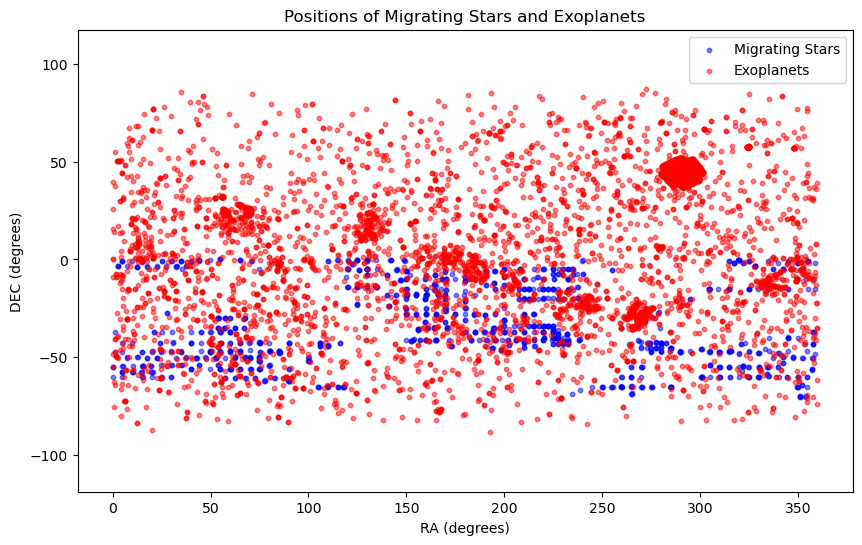

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(migrating_stars_catalogue['RA'], migrating_stars_catalogue['DEC'], 
            color='blue', label='Migrating Stars', alpha=0.5, s=10)             # migrating stars from Malu's catalogue
plt.scatter(exoplanet_catalogue['ra'], exoplanet_catalogue['dec'], 
            color='red', label='Exoplanets', alpha=0.5, s=10)                   # exoplanets
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Positions of Migrating Stars and Exoplanets')
plt.legend()
# plt.xlim(0,360)
# plt.ylim(-90,90)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

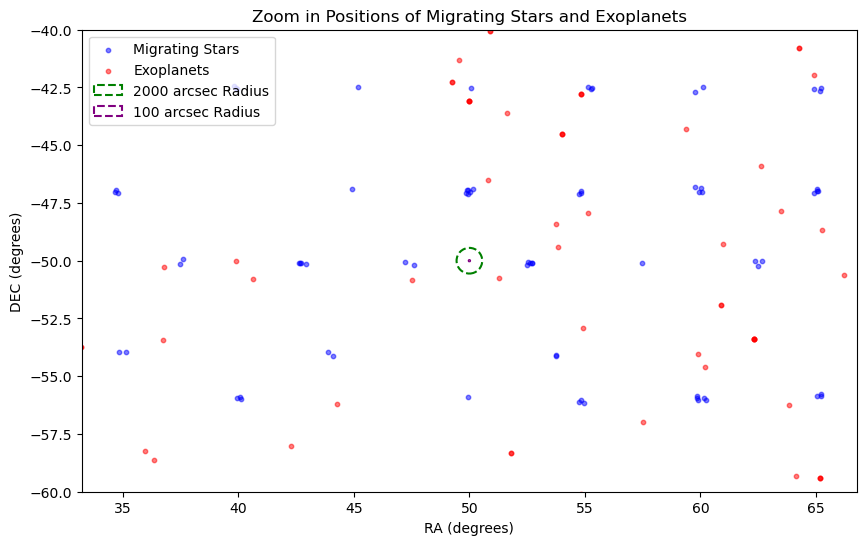

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(migrating_stars_catalogue['RA'], migrating_stars_catalogue['DEC'], 
            color='blue', label='Migrating Stars', alpha=0.5, s=10)  # migrating stars
plt.scatter(exoplanet_catalogue['ra'], exoplanet_catalogue['dec'], 
            color='red', label='Exoplanets', alpha=0.5, s=10)  # exoplanets

# 2000 and 100 arcsec disks
center_ra = 50  # Cambia este valor según el centro deseado
center_dec = -50  # Cambia este valor según el centro deseado
radius_2000_arcsec = 2000 / 3600  # Radio de 2000 arcsec en grados
radius_100_arcsec = 100 / 3600  # Radio de 100 arcsec en grados

disk_2000 = Circle((center_ra, center_dec), radius_2000_arcsec, color='green', fill=False, linestyle='--', linewidth=1.5, label='2000 arcsec Radius')
plt.gca().add_patch(disk_2000)
disk_100 = Circle((center_ra, center_dec), radius_100_arcsec, color='purple', fill=False, linestyle='--', linewidth=1.5, label='100 arcsec Radius')
plt.gca().add_patch(disk_100)

plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.title('Zoom in Positions of Migrating Stars and Exoplanets')
plt.legend()
plt.xlim(center_ra-10, center_ra+10)
plt.ylim(center_dec-10, center_dec+10)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

In [10]:
# Remove rows with NaN values in the (RA, DEC) coordinates of both catalogues
migrating_stars_catalogue = migrating_stars_catalogue.dropna(subset=['RA', 'DEC'])
exoplanet_catalogue = exoplanet_catalogue.dropna(subset=['ra', 'dec'])

# SkyCoord objects using the stars and exoplanet coordinates
stars_coords = SkyCoord(ra=migrating_stars_catalogue['RA'].values * u.deg, 
                        dec=migrating_stars_catalogue['DEC'].values * u.deg)

exoplanets_coords = SkyCoord(ra=exoplanet_catalogue['ra'].values * u.deg, 
                             dec=exoplanet_catalogue['dec'].values * u.deg)

# Proximity threshold
threshold_arcsec = 500
threshold_deg = threshold_arcsec / 3600  # Convert to degrees

# Cross-match between the coordinate lists
star_indices, exoplanet_indices, d2d, d3d = exoplanets_coords.search_around_sky(stars_coords, threshold_deg * u.deg)

# DataFrame with indices and distances
match_summary = pd.DataFrame({
    'Star_Index': star_indices,
    'Exoplanet_Index': exoplanet_indices,
    'Distance_deg': d2d.deg,
    'Distance_arcsec': d2d.arcsec
})

# Sort the star-exoplanet pairs by distance
match_summary = match_summary.sort_values(by='Distance_arcsec')

print(f"Number of matches found: {len(match_summary)}")
print(match_summary)

Number of matches found: 9
   Star_Index  Exoplanet_Index  Distance_deg  Distance_arcsec
6         858             5679      0.052405       188.656566
0           1             1920      0.066040       237.742434
8        1149             5587      0.100065       360.234323
2         821             1935      0.101247       364.487674
5         852             5679      0.109156       392.963003
7        1147             5587      0.109357       393.685305
4         848             5679      0.110444       397.599511
1         489             1818      0.114030       410.508077
3         822             1935      0.129299       465.474945


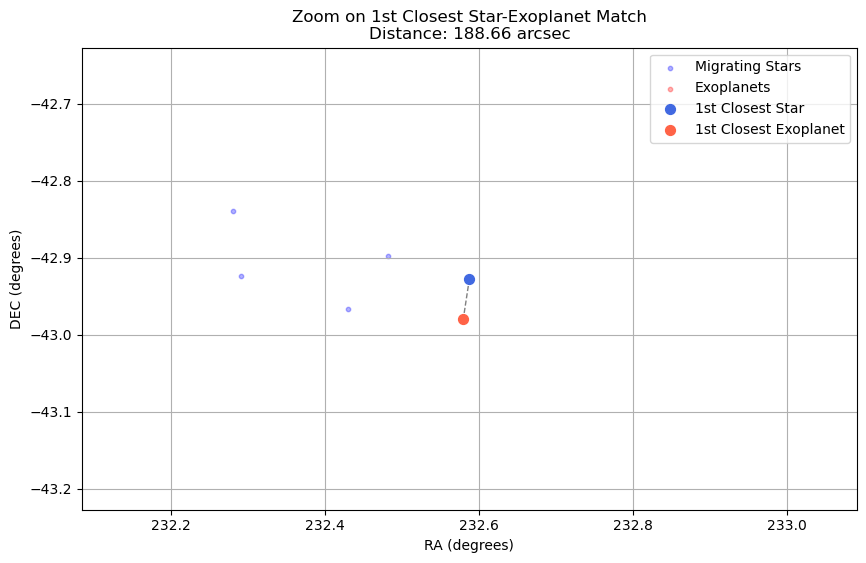

In [11]:
# Select the closest star-exoplanet pair for visualization
ranking_number = 0  # Change this to 1 for the 2nd closest pair, 2 for the 3rd, etc.
closest_star_idx = int(match_summary.iloc[ranking_number]['Star_Index'])
closest_exoplanet_idx = int(match_summary.iloc[ranking_number]['Exoplanet_Index'])

# Extract coordinates of the closest star and exoplanet
star_closest = migrating_stars_catalogue.iloc[closest_star_idx]
exoplanet_closest = exoplanet_catalogue.iloc[closest_exoplanet_idx]

# Visualize all stars and exoplanets in the catalogue
plt.figure(figsize=(10, 6))
plt.scatter(migrating_stars_catalogue['RA'], migrating_stars_catalogue['DEC'], 
            color='blue', label='Migrating Stars', alpha=0.3, s=10)
plt.scatter(exoplanet_catalogue['ra'], exoplanet_catalogue['dec'], 
            color='red', label='Exoplanets', alpha=0.3, s=10)

# Highlight the closest star-exoplanet pair with bigger disks
plt.scatter(star_closest['RA'], star_closest['DEC'], color='royalblue', 
            label=f'{ranking_number+1}st Closest Star', s=50, zorder=5)  # Brighter blue
plt.scatter(exoplanet_closest['ra'], exoplanet_closest['dec'], color='tomato', 
            label=f'{ranking_number+1}st Closest Exoplanet', s=50, zorder=5)  # Brighter red

# Add a line showing the distance between the star and exoplanet
plt.plot([star_closest['RA'], exoplanet_closest['ra']], 
         [star_closest['DEC'], exoplanet_closest['dec']], 
         color="gray", linestyle="--", linewidth=1)

# Zoom in on the closest pair
zoom_radius = 0.3  # Adjust zoom radius in degrees if needed
plt.xlim(star_closest['RA'] - zoom_radius, star_closest['RA'] + zoom_radius)
plt.ylim(star_closest['DEC'] - zoom_radius, star_closest['DEC'] + zoom_radius)

# Modify the title to show the ranking number (1st, 2nd, 3rd, etc.)
suffix = ['st', 'nd', 'rd'][ranking_number] if ranking_number < 3 else 'th'  # For proper suffix
plt.title(f'Zoom on {ranking_number+1}{suffix} Closest Star-Exoplanet Match\nDistance: {match_summary.iloc[ranking_number]["Distance_arcsec"]:.2f} arcsec')

plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

# Conclusion
**NO APPARENT MATCHES** between Malu's and exoplanet catalogues